In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [22]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('train_data.csv')

# 'left'가 변수 이름에 들어간 열과 'label' 열을 선택하여 data_1로 저장
columns_to_select = [col for col in data.columns if 'left' in col] + ['label']
data_1 = data[columns_to_select].copy()

# data_1 확인
print(data_1.head())


   left_shoulder_x  left_shoulder_y  left_elbow_x  left_elbow_y  left_wrist_x  \
0         0.524863         0.555625      0.507023      0.651277      0.470332   
1         0.522562         0.578823      0.507091      0.673083      0.466630   
2         0.520056         0.552761      0.505723      0.643683      0.466629   
3         0.521530         0.469933      0.503777      0.551353      0.463504   
4         0.525848         0.398923      0.505607      0.468997      0.469968   

   left_wrist_y  left_hip_x  left_hip_y  left_knee_x  left_knee_y  \
0      0.574889    0.561175    0.729054     0.523271     0.741088   
1      0.600467    0.564359    0.752372     0.522961     0.749220   
2      0.581453    0.563935    0.724415     0.525168     0.747676   
3      0.485218    0.560847    0.655779     0.530541     0.738278   
4      0.402994    0.559319    0.608572     0.537026     0.740349   

   left_ankle_x  left_ankle_y  label  
0      0.548493      0.903862  squat  
1      0.547950     

In [23]:
# # 데이터 불러오기
# data = pd.read_csv('train_data.csv')

# 레이블 인코딩
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [24]:
data

,label,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1,0.524863,0.555625,0.465392,0.569899,0.507023,0.651277,0.438881,0.672194,0.470332,...,0.522626,0.733282,0.523271,0.741088,0.446830,0.742682,0.548493,0.903862,0.483344,0.885332
1,1,0.522562,0.578823,0.465818,0.598839,0.507091,0.673083,0.437776,0.698034,0.466630,...,0.524409,0.758274,0.522961,0.749220,0.445436,0.747380,0.547950,0.904223,0.481998,0.885388
2,1,0.520056,0.552761,0.465749,0.576391,0.505723,0.643683,0.436045,0.677045,0.466629,...,0.524932,0.733982,0.525168,0.747676,0.445119,0.745385,0.548582,0.904462,0.481201,0.884832
3,1,0.521530,0.469933,0.469378,0.499673,0.503777,0.551353,0.437997,0.588753,0.463504,...,0.522085,0.666640,0.530541,0.738278,0.447224,0.740103,0.549646,0.903296,0.482294,0.883559
4,1,0.525848,0.398923,0.473166,0.428377,0.505607,0.468997,0.440205,0.511146,0.469968,...,0.520813,0.615904,0.537026,0.740349,0.456055,0.725881,0.550732,0.903453,0.483261,0.884704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0,0.534212,0.288624,0.446377,0.287840,0.539146,0.413624,0.441007,0.421376,0.536072,...,0.462670,0.515261,0.510333,0.713988,0.466871,0.713199,0.512870,0.879027,0.467020,0.875337
225,0,0.529975,0.294647,0.444278,0.284883,0.532500,0.414426,0.439593,0.415865,0.539644,...,0.458442,0.516839,0.507203,0.715752,0.464537,0.713233,0.511841,0.878740,0.467211,0.873697
226,0,0.523020,0.304750,0.443907,0.282729,0.526981,0.419463,0.446595,0.406037,0.543463,...,0.457985,0.518883,0.508118,0.713681,0.462020,0.714347,0.490385,0.863342,0.465708,0.871331
227,0,0.509316,0.302987,0.458463,0.281640,0.519792,0.405952,0.470443,0.407799,0.562132,...,0.471873,0.516672,0.502848,0.698980,0.484429,0.699787,0.485635,0.860572,0.467588,0.862808


In [25]:
# 입력 데이터와 레이블 분리
X = data.drop(columns=['label'])
y = data['label']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# 모델 생성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
epochs = 500  # 적당한 에포크 수
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500
6/6 [==============================] - 0s 15ms/step - loss: 0.6821 - accuracy: 0.5628 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.5628 - val_loss: 0.6691 - val_accuracy: 0.5000
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.5628 - val_loss: 0.6601 - val_accuracy: 0.5000
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.5628 - val_loss: 0.6684 - val_accuracy: 0.5000
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.5628 - val_loss: 0.6575 - val_accuracy: 0.5000
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.5628 - val_loss: 0.6517 - val_accuracy: 0.5000
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.5628 - val_loss: 0.6433 - val_accuracy: 0.5000
Epoch 8/500
6/6 [=========

In [30]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

2/2 [==============================] - 0s 1ms/step - loss: 7.7712e-04 - accuracy: 1.0000
Test loss: 0.0007771168020553887
Test accuracy: 1.0


2/2 [==============================] - 0s 1ms/step


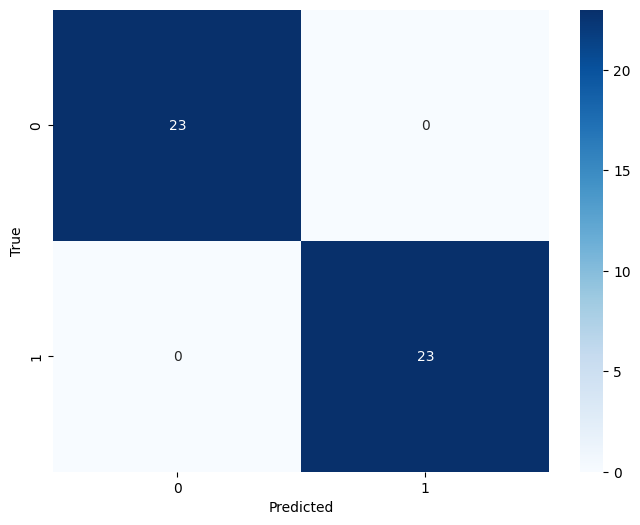

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터에 대한 예측값을 얻습니다
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix를 생성합니다
cm = confusion_matrix(y_test, y_pred_classes)

# Confusion Matrix를 시각화합니다
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 분류 리포트를 출력합니다
print(classification_report(y_test, y_pred_classes))


In [34]:
model.save('model/detection_model.h5')

/Users/gwon-yeonghyeon/anaconda3/envs/DL/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
